# TP1 Reinforcement Learning : Solving MDP s (Planning)

#### JOURDAN Pierre-Eliot M

In this notebook, feel free to modify and test different values of the parameters ($\gamma$, R...).

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import random
#import latex


## Performance prediction

### Question 1 :

During all this TP we will consider there are 12 states as follows :

| | | | 12 | 
|:--- |:------:|:------:| -----:|
|  6  |   7  |  8  | 11 |
|  5  | X |  9  | 10 | 
|  4  |   3  |  2  |  1 | 

We assume that when we reach either the states 10 or 11, we are brought (with probability = 1) to a "final" absorbing state 12 (that is not written in the exercise instructions). The reward in this state is 0, which does not change the result you obtain with 11 states. This choice was made to simplify the writing of the transition matrices.

In this question, we will compute the value function associated with the policy described in the instructions.

In [101]:
# Discunting factor :
gamma = 0.9

# Right-Left-Up-Down matrix :
M = np.array([[0.7, 0.1, 0.1, 0.1],
              [0.1, 0.7, 0.1, 0.1],
              [0.1, 0.1, 0.7, 0.1],
              [0.1, 0.1, 0.1, 0.7]])

# Construction of the P matrix :

P = np.array([[0.2, 0.7, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0],
              [0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0.7, 0, 0, 0],
              [0, 0.1, 0.8, 0.1, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0.1, 0.8, 0.1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0.1, 0.8, 0.1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0.1, 0.8, 0.1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0.7, 0.2, 0.1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0.7, 0.1, 0.1, 0, 0.1, 0],
              [0, 0.1, 0, 0, 0, 0, 0, 0.1, 0.7, 0.1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],])
print('P =',P)

# Construction of the reward vector R :

R = [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1, 1, 0]
print('Reward vector =',R)

# Let's compute the value function associated with the policy under study :

V_rand = np.linalg.inv((np.eye((12)) - gamma*P))@R
print('Value function = ',V_rand)



P = [[0.2 0.7 0.  0.  0.  0.  0.  0.  0.  0.1 0.  0. ]
 [0.1 0.1 0.1 0.  0.  0.  0.  0.  0.7 0.  0.  0. ]
 [0.  0.1 0.8 0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.8 0.1 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.8 0.1 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.8 0.1 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.7 0.2 0.1 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.7 0.1 0.1 0.  0.1 0. ]
 [0.  0.1 0.  0.  0.  0.  0.  0.1 0.7 0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]]
Reward vector = [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -1, 1, 0]
Value function =  [-0.55588703 -0.51718629 -0.44235628 -0.41458882 -0.40303114 -0.3948414
 -0.38091988 -0.26226912 -0.54094861 -1.          1.          0.        ]


### Question 2 :

In this question, we will evaluate the policy using Iterative Policy Evaluation :

$V_{k+1}(s) = r(s,a) + \gamma \sum_{s' \in S} p(s'|s,a) V_k(s')$

In [102]:
delta = 0.0001
V_k = np.zeros(12)
print(V_k)

# Iterative Policy Evaluation :
def iterative_policy_eval(V_j,delta_j):
    while max(abs(V_rand-V_j)) > delta_j:
        V_j = R + gamma*P@V_j
    return V_j

print(iterative_policy_eval(V_k,delta))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-0.55584733 -0.51714129 -0.44229101 -0.41450748 -0.402939   -0.39474442
 -0.3808243  -0.26218949 -0.54090616 -1.          1.          0.        ]


### Question 3 :

In this question, we will verify the Bellman operator is a contraction. We will take two initial vectors with random values and compute the max of their differences while applying the Iterative Policy Evaluation on both of them.

Text(0.5, 1.0, 'Evolution of abs(max($V_1-V_2$))')

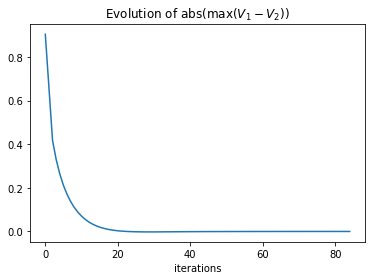

In [103]:
# vectors initialization :
V1 = V0 = np.random.rand(12)
V2 = V0 = np.random.rand(12)
max_list = [max(V1-V2)]

c=0
while max(abs(V_rand-V1)) > delta:
        V1 = R + gamma*P@V1
        V2 = R + gamma*P@V2
        max_list.append(max(V1-V2))
        c = c+1

# plot evolution of the difference between the 2 vectors :
plt.figure()
plt.plot(range(c+1),max_list)
plt.xlabel('iterations')
plt.title('Evolution of abs(max($V_1-V_2$))')



We realize the quantity converges towards zero. This illustrates the fact that, whatever initial vector we take, the Iterative Policy Evaluation will converge towards the same final value $V_{\pi}$ (expected value). Thus, the Bellman operator is a $\gamma$-contraction.

## Optimization

### Question 1 :

The Bellman equation that characterizes the optimal policy can be written as followed :

$\pi^*(s) \in$ argmax $_{a \in A} [r(s,a) + \gamma \sum_{s' \in S} p(s'|s,a) V_*(s')]$

We also have : $V_*(s) =$ max $_{a \in A} [r(s,a) + \gamma \sum_{s' \in S} p(s'|s,a) V_*(s')]$

### Question 2 :
Let's solve numerically the optimal value function by Value Iteration Algorithm. To do this we will write down the transition matrices for the 4 possible directions (Left, Right, Up, Down). At every iteration we compute the value with each of the 4 matrices and keep the maximum value, giving us the corresponding direction.

In [104]:

P_left = np.array([ [0.2, 0.7, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0],
                    [0.1, 0.1, 0.7, 0, 0, 0, 0, 0, 0.1, 0, 0, 0],
                    [0, 0.1, 0.2, 0.7, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0.1, 0.8, 0.1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0.1, 0.8, 0.1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0.1, 0.8, 0.1, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0.7, 0.2, 0.1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0.7, 0.1, 0.1, 0, 0.1, 0],
                    [0, 0.1, 0, 0, 0, 0, 0, 0.1, 0.7, 0.1, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],])


P_right = np.array([[0.8, 0.1, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0],
                    [0.7, 0.1, 0.1, 0, 0, 0, 0, 0, 0.1, 0, 0, 0],
                    [0, 0.7, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0.7, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0.1, 0.8, 0.1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0.1, 0.2, 0.7, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0.1, 0.2, 0.7, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0, 0.7, 0],
                    [0, 0.1, 0, 0, 0, 0, 0, 0.1, 0.1, 0.7, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],])


P_up = np.array([   [0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0.7, 0, 0],
                    [0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0.7, 0, 0, 0],
                    [0, 0.1, 0.8, 0.1, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0.1, 0.2, 0.7, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0.1, 0.2, 0.7, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0.1, 0.8, 0.1, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0.1, 0.8, 0.1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0.1, 0.7, 0.1, 0, 0.1, 0],
                    [0, 0.1, 0, 0, 0, 0, 0, 0.7, 0.1, 0.1, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],])


P_down = np.array([ [0.8, 0.1, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0],
                    [0.1, 0.7, 0.1, 0, 0, 0, 0, 0, 0.1, 0, 0, 0],
                    [0, 0.1, 0.8, 0.1, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0.1, 0.8, 0.1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0.7, 0.2, 0.1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0.7, 0.2, 0.1, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0.1, 0.8, 0.1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.7, 0, 0.1, 0],
                    [0, 0.7, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],])

# let's modify the reward function by setting the value -10 for the state 10 (instead of -1):
R = [-0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -0.04, -10, 1, 0]


V0 = np.random.rand(12)
policy =[]
for i in range(100):
    V_left = R + gamma*P_left@V0
    V_right = R + gamma*P_right@V0
    V_up = R + gamma*P_up@V0
    V_down = R + gamma*P_down@V0
    val = [V_left, V_right, V_up, V_down]
    V0 = np.max(val,axis=0)
    policy = np.argmax(val,axis=0)
print('Optimal value :',V0)

# We can print the optimal policy :
policy_opt = policy
print('directions : left(1), right(2), up(3), down(4)')
print('Optimal policy :', policy_opt+1)
V_opt = V0


Optimal value : [-1.31206263e+00 -2.15701688e-01  2.72061655e-02  1.29717197e-01
  2.28443132e-01  3.42299122e-01  4.76388929e-01  6.34653376e-01
 -6.14923973e-01 -9.99999627e+00  1.00000373e+00  3.73470303e-06]
directions : left(1), right(2), up(3), down(4)
Optimal policy : [1 1 1 3 3 2 2 2 3 1 1 1]


We noticed that with reward -1 at state 10, we could not obtain the optimal policy (by comparing it with the directions in the instructions of the TP). However, by decreasing the reward (down to -10) we could get the wanted optimal policy.

### Question 3 :

In this question, we want to build the 2D transition matrix representing the optimal policy. As said previously, we can infer the optimal action in every state from the optimal value function by selecting the direction associated with the maximum value function (see previous question).

In the same time, we show in the following code that the solution we obtained in question 2 verifies the Bellman equation (comparing the theoretical / experimental value functions).


In [105]:

# let's build the P' matrix associated with the optimal policy :

def build_P(policy_list):
    P = np.zeros((12,12))
    for i in range(len(policy_list)):
        if policy_list[i] == 0:
            P[i,:] = P_left[i,:]
        elif policy_list[i] == 1:
            P[i,:] = P_right[i,:]
        elif policy_list[i] == 2:
            P[i,:] = P_up[i,:]
        else:
            P[i,:] = P_down[i,:]
    return P

P_opt = build_P(policy_opt)
print(P_opt)

# solves Bellman equation :
V_test = np.linalg.inv(np.eye(12) - gamma*P_opt)@R
print(V_opt - V_test)



[[0.2 0.7 0.  0.  0.  0.  0.  0.  0.  0.1 0.  0. ]
 [0.1 0.1 0.7 0.  0.  0.  0.  0.  0.1 0.  0.  0. ]
 [0.  0.1 0.2 0.7 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.2 0.7 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.2 0.7 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.2 0.7 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.1 0.2 0.7 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.1 0.1 0.1 0.  0.7 0. ]
 [0.  0.1 0.  0.  0.  0.  0.  0.7 0.1 0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]]
[3.73470303e-06 3.73470303e-06 3.73470303e-06 3.73470303e-06
 3.73470303e-06 3.73470303e-06 3.73470303e-06 3.73470303e-06
 3.73470303e-06 3.73470303e-06 3.73470303e-06 3.73470303e-06]


### Question 4 :

Let's now compare the performances obtained with the random policy and the optimal one. Now that we have the transition matrices for boh cases, we can apply the Iterative Policy Evaluation and compare the convergence of the solution.

[2.01582369e+00 2.62376940e+00 1.31606880e+00 8.55596542e-01
 7.53427346e-01 8.05259552e-01 9.47281608e-01 1.23984144e+00
 2.76350663e+00 3.73470303e-06 3.73470303e-06 3.73470303e-06]


Text(0.5, 1.0, 'Convergence comparison')

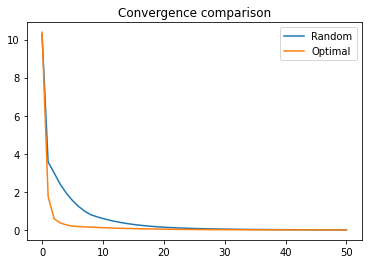

In [106]:
# Values obtained with random and optimal policies (previously computed) :
V_rand = np.linalg.inv((np.eye((12)) - gamma*P))@R
V_opt = V0

# Let's apply Iterative Policy Evaluation :
V_rand2 = np.random.rand(12)
V_opt2 = np.random.rand(12)
e_rand = [max(abs(V_rand-V_rand2))]
e_opt = [max(abs(V_opt-V_opt2))]

for i in range(50):
    V_rand2 = R + gamma*P@V_rand2
    V_opt2 = R + gamma*P_opt@V_opt2
    e_rand.append(max(abs(V_rand-V_rand2)))
    e_opt.append(max(abs(V_opt-V_opt2)))

print(V_opt-V_rand)

plt.figure()
plt.plot(range(51),e_rand,label='Random')
plt.plot(range(51),e_opt,label='Optimal')
plt.legend()
plt.title('Convergence comparison')



We notice on the figure we have a faster convergence with the optimal policy. We also remark, by comparing the difference of the 2 vectors, that the optimal value function is (slightly) superior to the random one. Therefore, we can say the optimal policy performs better.

### Question 5 :

The goal of this question is to to calculate the optimal policy using Policy Iteration. We will start ($\pi_0$) with the random policy of part 1 ("Performance prediction" section). We will carry out one improvement step of the Policy iteration and represent the obtained policy $\pi_1$ in a 2D matrix.

In [107]:
# One step of the algorithm :
# pi_0
V0 = np.linalg.inv((np.eye((12)) - gamma*P))@R

# greedy (pi_1):

policy_step1 =[]
V_left = R + gamma*P_left@V0
V_right = R + gamma*P_right@V0
V_up = R + gamma*P_up@V0
V_down = R + gamma*P_down@V0
val = [V_left, V_right, V_up, V_down]
V0 = np.max(val,axis=0)
policy_step1 = np.argmax(val,axis=0)
print('Policy step 1 :',policy_step1+1)

P_step1 = build_P(policy_step1)
print(P_step1)

# print('Value with random : ',np.linalg.inv((np.eye((12)) - gamma*P))@R)
# print('Value with one step Policy Iteration : ',np.linalg.inv((np.eye((12)) - gamma*P_step1))@R)

print('Distance between pi_1 and pi* =', np.linalg.norm(P_step1 - P_opt))
print('Distance between pi_0 and pi* =', np.linalg.norm(P - P_opt))

Policy step 1 : [1 1 1 3 3 1 1 2 3 1 1 1]
[[0.2 0.7 0.  0.  0.  0.  0.  0.  0.  0.1 0.  0. ]
 [0.1 0.1 0.7 0.  0.  0.  0.  0.  0.1 0.  0.  0. ]
 [0.  0.1 0.2 0.7 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.2 0.7 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.2 0.7 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.8 0.1 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.7 0.2 0.1 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.1 0.1 0.1 0.  0.7 0. ]
 [0.  0.1 0.  0.  0.  0.  0.  0.7 0.1 0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]]
Distance between pi_1 and pi* = 1.2
Distance between pi_0 and pi* = 2.4


We can compare the value function obtained with random policy and after one step of Policy iteration (see code above). 

We compute the quantities : $||\pi_1-\pi^*||$ and $||\pi_0-\pi^*||$  and we get : $||\pi_1-\pi^*||$ < $||\pi_0-\pi^*||$ which means we get a better policy after one iteration.

### Question 6 :

Let's continue iterating the Prediction and the greedy steps until convergence to the optimal policy. We will plot the evolution of $||\pi_{k+1}-\pi^*||$ for every iteration which will give us the number of iterations before convergence (the algorithm stops when $||\pi_{k+1}-\pi^*|| = 0$).

Text(0.5, 0, 'iterations')

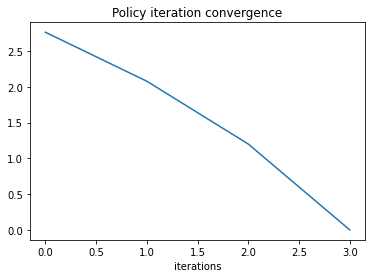

In [108]:
# Policy Iteration algorithm :

V0 = np.linalg.inv((np.eye((12)) - gamma*P))@R
next_policy =np.zeros(12)
cvg = [abs(max(V_opt-V0))]
P_prev = P
c=0
dist = 10

while dist > 0.5 :
    V_left = R + gamma*P_left@V0
    V_right = R + gamma*P_right@V0
    V_up = R + gamma*P_up@V0
    V_down = R + gamma*P_down@V0
    val = [V_left, V_right, V_up, V_down]
    dist = max(abs(next_policy - np.argmax(val,axis=0)))
    next_policy = np.argmax(val,axis=0)

    P_next = build_P(next_policy)
    V0 = np.linalg.inv((np.eye((12)) - gamma*P_next))@R
    cvg.append(np.linalg.norm(P_prev - P_next))
    P_prev = P_next
    c = c+1

plt.figure()
plt.plot(range(c+1),cvg)
plt.title('Policy iteration convergence')
plt.xlabel('iterations')

    

### Question 7 :

In this question, we will aply the Policy iteration algorithm, but this time $\gamma$ will take a certain range of values. We will both plot the structure of the optimal policy and the number of iterations before convergence for every value of $\gamma$.

gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
directions : left(1), right(2), up(3), down(4)
[[1. 1. 1. 3. 3. 2. 2. 2. 3. 1. 1. 1.]
 [1. 1. 1. 3. 3. 2. 2. 2. 3. 1. 1. 1.]
 [1. 1. 1. 3. 3. 2. 2. 2. 3. 1. 1. 1.]
 [1. 1. 1. 3. 3. 2. 2. 2. 3. 1. 1. 1.]
 [1. 1. 1. 3. 3. 2. 2. 2. 3. 1. 1. 1.]
 [1. 1. 1. 3. 3. 2. 2. 2. 3. 1. 1. 1.]
 [1. 1. 1. 3. 3. 2. 2. 2. 3. 1. 1. 1.]
 [1. 1. 1. 3. 3. 2. 2. 2. 3. 1. 1. 1.]]


Text(0.5, 0, '$\\gamma$')

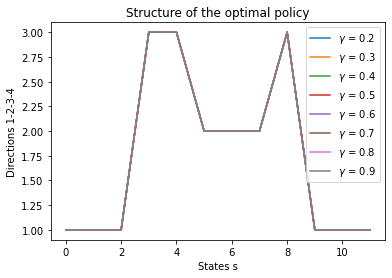

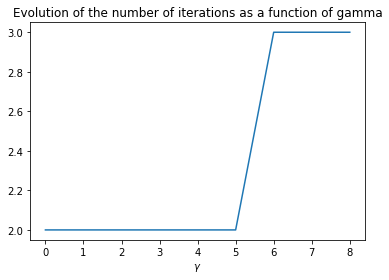

In [109]:
# range of values for gamma :
gamma_list = [i/10 for i in range(1,10)]
print('gamma =',gamma_list)
results = np.zeros(12)
c_list = []

for i in range(len(gamma_list)):
    V0 = np.linalg.inv((np.eye((12)) - gamma_list[i]*P))@R
    next_policy = np.random.rand(12)
    dist = 10
    c=0

    while dist > 0.5 :
        V_left = R + gamma_list[i]*P_left@V0
        V_right = R + gamma_list[i]*P_right@V0
        V_up = R + gamma_list[i]*P_up@V0
        V_down = R + gamma_list[i]*P_down@V0
        val = [V_left, V_right, V_up, V_down]
        #V0 = np.max(val,axis=0)
        dist = max(abs(next_policy - np.argmax(val,axis=0)))
        next_policy = np.argmax(val,axis=0)
        P_next = build_P(next_policy)
        V0 = np.linalg.inv((np.eye((12)) - gamma*P_next))@R
        c = c+1
    
    # optimal policy :
    results = np.block([[results],[next_policy+1]])
    c_list.append(c)

# we print thestructure of the optimal policy obtained for every value of gamma :
print('directions : left(1), right(2), up(3), down(4)')
print(results[1:len(gamma_list),:])

# plot of the structure of optimal policy :
plt.figure()
for i in range(1,len(gamma_list)):
    j = gamma_list[i]
    plt.plot(range(12),results[i,:],label='$\gamma$ = {j}'.format(j=j))
plt.legend()
plt.title('Structure of the optimal policy')
plt.xlabel('States s')
plt.ylabel('Directions 1-2-3-4')

# Number of iterations as a function of gamma
plt.figure()
plt.plot(range(len(gamma_list)),c_list)
plt.title('Evolution of the number of iterations as a function of gamma')
plt.xlabel('$\gamma$')



We notice the structure of the optimal policy is the same whatever value of $\gamma$ we take. We also notice there is convergence of the optimal policy generally under 5 iterations. Yet, for some combination of hyperparameters, we notice there is no convergence at all.